# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [ ]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

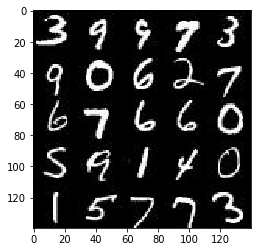

In [26]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

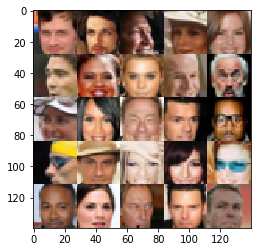

In [27]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [28]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


/home/huanchar/.local/lib/python3.5/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [29]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    inputs_z =  tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, (None), name='learning_rate')
    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [30]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: ImplementFunction
    
    
    x = images
    alpha = 0.2
    with tf.variable_scope('discriminator', reuse=reuse):
        
        x1 = tf.layers.conv2d(x, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        # 16x16x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 8x8x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [31]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha=0.2
    reuse = not is_train
    
    with tf.variable_scope('generator', reuse=reuse):
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 4, strides=1, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        x3 = tf.layers.conv2d_transpose(x2, 128, 4, strides=2, padding="same")
        x3 = tf.layers.batch_normalization(x3,training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 4, strides=2, padding='same')
        # 28x28x3 now
         
        out = tf.tanh(logits)
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [32]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real, False)
    d_model_fake, d_logits_fake = discriminator(g_model, True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    d_loss = d_loss_real + d_loss_fake
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [33]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    all_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    
    g_update_ops = [var for var in all_update_ops if var.name.startswith('generator')]
    d_update_ops = [var for var in all_update_ops if var.name.startswith('discriminator')]
    # Optimize
    with tf.control_dependencies(d_update_ops):
        d_train_opt = tf.train.AdamOptimizer(learning_rate,beta1=beta1).minimize(d_loss, var_list=d_vars)
    with tf.control_dependencies(g_update_ops):
        g_train_opt = tf.train.AdamOptimizer(learning_rate,beta1=beta1).minimize(g_loss, var_list=g_vars)
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [34]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [35]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z, lr  = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z,data_shape[-1])
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    print_every = 10
    show_every = 100

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                x = 2.0*batch_images

                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: x, input_z: batch_z, lr:learning_rate})
                _ = sess.run(g_opt, feed_dict={  input_z: batch_z, lr:learning_rate})

                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: x})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{} Step:{}...".format(epoch_i +1, epochs, steps),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                if steps % show_every == 0:
                    show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)




### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2 Step:10... Discriminator Loss: 1.3445... Generator Loss: 0.4072
Epoch 1/2 Step:20... Discriminator Loss: 1.1193... Generator Loss: 0.7417
Epoch 1/2 Step:30... Discriminator Loss: 2.8791... Generator Loss: 5.6849
Epoch 1/2 Step:40... Discriminator Loss: 1.9796... Generator Loss: 0.2419
Epoch 1/2 Step:50... Discriminator Loss: 1.4284... Generator Loss: 0.6535
Epoch 1/2 Step:60... Discriminator Loss: 1.6403... Generator Loss: 0.4724
Epoch 1/2 Step:70... Discriminator Loss: 1.3693... Generator Loss: 0.5606
Epoch 1/2 Step:80... Discriminator Loss: 1.2541... Generator Loss: 0.6711
Epoch 1/2 Step:90... Discriminator Loss: 0.9371... Generator Loss: 1.0036
Epoch 1/2 Step:100... Discriminator Loss: 1.4740... Generator Loss: 1.7246


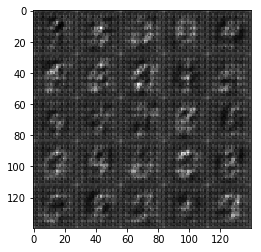

Epoch 1/2 Step:110... Discriminator Loss: 1.1533... Generator Loss: 1.1630
Epoch 1/2 Step:120... Discriminator Loss: 1.0900... Generator Loss: 0.8531
Epoch 1/2 Step:130... Discriminator Loss: 1.2231... Generator Loss: 0.6930
Epoch 1/2 Step:140... Discriminator Loss: 1.1899... Generator Loss: 0.7592
Epoch 1/2 Step:150... Discriminator Loss: 1.1355... Generator Loss: 0.8480
Epoch 1/2 Step:160... Discriminator Loss: 1.2111... Generator Loss: 0.4857
Epoch 1/2 Step:170... Discriminator Loss: 1.0958... Generator Loss: 0.5972
Epoch 1/2 Step:180... Discriminator Loss: 1.3365... Generator Loss: 2.1926
Epoch 1/2 Step:190... Discriminator Loss: 1.0800... Generator Loss: 0.6416
Epoch 1/2 Step:200... Discriminator Loss: 1.3211... Generator Loss: 0.4597


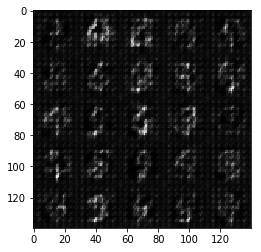

Epoch 1/2 Step:210... Discriminator Loss: 1.0487... Generator Loss: 0.7699
Epoch 1/2 Step:220... Discriminator Loss: 0.9271... Generator Loss: 1.0011
Epoch 1/2 Step:230... Discriminator Loss: 1.0113... Generator Loss: 0.6243
Epoch 1/2 Step:240... Discriminator Loss: 1.0009... Generator Loss: 1.8521
Epoch 1/2 Step:250... Discriminator Loss: 0.7794... Generator Loss: 0.9653
Epoch 1/2 Step:260... Discriminator Loss: 1.1069... Generator Loss: 1.5169
Epoch 1/2 Step:270... Discriminator Loss: 0.9665... Generator Loss: 1.0021
Epoch 1/2 Step:280... Discriminator Loss: 0.8633... Generator Loss: 0.9420
Epoch 1/2 Step:290... Discriminator Loss: 1.6785... Generator Loss: 2.3867
Epoch 1/2 Step:300... Discriminator Loss: 0.9423... Generator Loss: 1.0237


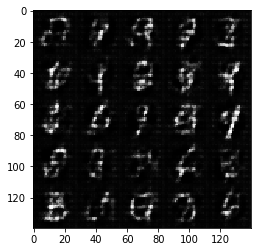

Epoch 1/2 Step:310... Discriminator Loss: 1.7112... Generator Loss: 0.2466
Epoch 1/2 Step:320... Discriminator Loss: 0.8538... Generator Loss: 1.4050
Epoch 1/2 Step:330... Discriminator Loss: 0.9550... Generator Loss: 1.2965
Epoch 1/2 Step:340... Discriminator Loss: 1.1204... Generator Loss: 1.7882
Epoch 1/2 Step:350... Discriminator Loss: 1.3137... Generator Loss: 0.4291
Epoch 1/2 Step:360... Discriminator Loss: 1.3040... Generator Loss: 0.4064
Epoch 1/2 Step:370... Discriminator Loss: 0.9575... Generator Loss: 1.6088
Epoch 1/2 Step:380... Discriminator Loss: 1.1923... Generator Loss: 0.4895
Epoch 1/2 Step:390... Discriminator Loss: 0.8258... Generator Loss: 1.1707
Epoch 1/2 Step:400... Discriminator Loss: 1.9843... Generator Loss: 0.1793


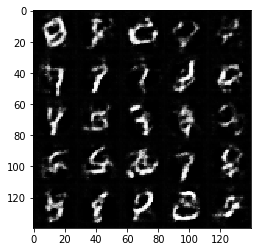

Epoch 1/2 Step:410... Discriminator Loss: 0.8903... Generator Loss: 1.1566
Epoch 1/2 Step:420... Discriminator Loss: 1.0631... Generator Loss: 1.4960
Epoch 1/2 Step:430... Discriminator Loss: 1.0280... Generator Loss: 0.8446
Epoch 1/2 Step:440... Discriminator Loss: 0.9257... Generator Loss: 1.0449
Epoch 1/2 Step:450... Discriminator Loss: 1.0502... Generator Loss: 0.6760
Epoch 1/2 Step:460... Discriminator Loss: 1.0247... Generator Loss: 1.4433
Epoch 1/2 Step:470... Discriminator Loss: 1.3737... Generator Loss: 1.8093
Epoch 1/2 Step:480... Discriminator Loss: 1.1714... Generator Loss: 0.5779
Epoch 1/2 Step:490... Discriminator Loss: 0.9626... Generator Loss: 1.0755
Epoch 1/2 Step:500... Discriminator Loss: 0.9856... Generator Loss: 0.7943


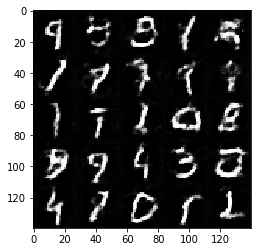

Epoch 1/2 Step:510... Discriminator Loss: 1.1465... Generator Loss: 1.4535
Epoch 1/2 Step:520... Discriminator Loss: 1.0007... Generator Loss: 1.3877
Epoch 1/2 Step:530... Discriminator Loss: 0.8851... Generator Loss: 0.9348
Epoch 1/2 Step:540... Discriminator Loss: 1.0555... Generator Loss: 0.7467
Epoch 1/2 Step:550... Discriminator Loss: 0.9216... Generator Loss: 0.8662
Epoch 1/2 Step:560... Discriminator Loss: 0.9912... Generator Loss: 0.9022
Epoch 1/2 Step:570... Discriminator Loss: 1.1092... Generator Loss: 0.6056
Epoch 1/2 Step:580... Discriminator Loss: 0.9799... Generator Loss: 0.8019
Epoch 1/2 Step:590... Discriminator Loss: 1.0224... Generator Loss: 0.9770
Epoch 1/2 Step:600... Discriminator Loss: 0.9213... Generator Loss: 1.1775


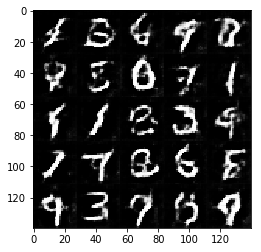

Epoch 2/2 Step:610... Discriminator Loss: 1.0163... Generator Loss: 0.8649
Epoch 2/2 Step:620... Discriminator Loss: 1.3631... Generator Loss: 0.4126
Epoch 2/2 Step:630... Discriminator Loss: 1.0048... Generator Loss: 0.6860
Epoch 2/2 Step:640... Discriminator Loss: 1.0820... Generator Loss: 0.6723
Epoch 2/2 Step:650... Discriminator Loss: 0.9046... Generator Loss: 1.1707
Epoch 2/2 Step:660... Discriminator Loss: 1.4033... Generator Loss: 0.4746
Epoch 2/2 Step:670... Discriminator Loss: 1.0902... Generator Loss: 0.7629
Epoch 2/2 Step:680... Discriminator Loss: 0.9977... Generator Loss: 0.7698
Epoch 2/2 Step:690... Discriminator Loss: 0.8163... Generator Loss: 0.9779
Epoch 2/2 Step:700... Discriminator Loss: 1.0813... Generator Loss: 0.5779


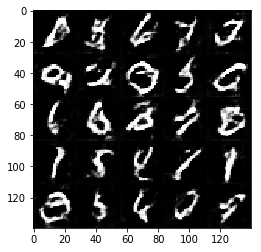

Epoch 2/2 Step:710... Discriminator Loss: 0.8951... Generator Loss: 0.8061
Epoch 2/2 Step:720... Discriminator Loss: 1.8119... Generator Loss: 0.2422
Epoch 2/2 Step:730... Discriminator Loss: 0.8849... Generator Loss: 0.9945
Epoch 2/2 Step:740... Discriminator Loss: 1.0527... Generator Loss: 0.6435
Epoch 2/2 Step:750... Discriminator Loss: 2.7295... Generator Loss: 0.1091
Epoch 2/2 Step:760... Discriminator Loss: 0.9613... Generator Loss: 1.0466
Epoch 2/2 Step:770... Discriminator Loss: 0.7903... Generator Loss: 0.9789
Epoch 2/2 Step:780... Discriminator Loss: 0.8189... Generator Loss: 0.8959
Epoch 2/2 Step:790... Discriminator Loss: 1.2966... Generator Loss: 1.0798
Epoch 2/2 Step:800... Discriminator Loss: 2.0415... Generator Loss: 0.1996


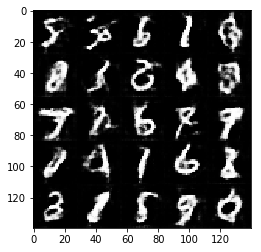

Epoch 2/2 Step:810... Discriminator Loss: 1.0070... Generator Loss: 0.7492
Epoch 2/2 Step:820... Discriminator Loss: 1.1680... Generator Loss: 0.5120
Epoch 2/2 Step:830... Discriminator Loss: 0.8176... Generator Loss: 0.8043
Epoch 2/2 Step:840... Discriminator Loss: 1.6936... Generator Loss: 2.0512
Epoch 2/2 Step:850... Discriminator Loss: 1.0126... Generator Loss: 1.0216
Epoch 2/2 Step:860... Discriminator Loss: 1.2028... Generator Loss: 0.5414
Epoch 2/2 Step:870... Discriminator Loss: 0.8462... Generator Loss: 1.1452
Epoch 2/2 Step:880... Discriminator Loss: 1.3891... Generator Loss: 0.3691
Epoch 2/2 Step:890... Discriminator Loss: 1.1601... Generator Loss: 0.5459
Epoch 2/2 Step:900... Discriminator Loss: 0.9342... Generator Loss: 0.7060


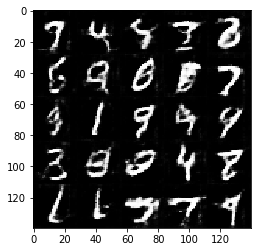

Epoch 2/2 Step:910... Discriminator Loss: 1.0520... Generator Loss: 0.5935
Epoch 2/2 Step:920... Discriminator Loss: 3.6958... Generator Loss: 5.5808
Epoch 2/2 Step:930... Discriminator Loss: 1.1659... Generator Loss: 0.8796
Epoch 2/2 Step:940... Discriminator Loss: 1.3663... Generator Loss: 1.1553
Epoch 2/2 Step:950... Discriminator Loss: 0.9917... Generator Loss: 0.7238
Epoch 2/2 Step:960... Discriminator Loss: 1.0477... Generator Loss: 0.6240
Epoch 2/2 Step:970... Discriminator Loss: 0.9923... Generator Loss: 0.6324
Epoch 2/2 Step:980... Discriminator Loss: 1.0177... Generator Loss: 0.6564
Epoch 2/2 Step:990... Discriminator Loss: 0.8417... Generator Loss: 0.8495
Epoch 2/2 Step:1000... Discriminator Loss: 2.2868... Generator Loss: 0.1552


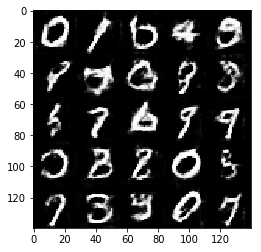

Epoch 2/2 Step:1010... Discriminator Loss: 1.0634... Generator Loss: 0.9643
Epoch 2/2 Step:1020... Discriminator Loss: 0.8630... Generator Loss: 0.9058
Epoch 2/2 Step:1030... Discriminator Loss: 0.8302... Generator Loss: 0.9065
Epoch 2/2 Step:1040... Discriminator Loss: 0.8874... Generator Loss: 0.7486
Epoch 2/2 Step:1050... Discriminator Loss: 1.0461... Generator Loss: 1.0840
Epoch 2/2 Step:1060... Discriminator Loss: 0.8647... Generator Loss: 0.7981
Epoch 2/2 Step:1070... Discriminator Loss: 0.8482... Generator Loss: 0.9301
Epoch 2/2 Step:1080... Discriminator Loss: 1.9083... Generator Loss: 0.2784
Epoch 2/2 Step:1090... Discriminator Loss: 0.8683... Generator Loss: 0.8063
Epoch 2/2 Step:1100... Discriminator Loss: 1.3087... Generator Loss: 2.8451


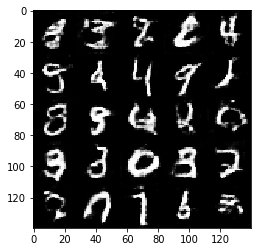

Epoch 2/2 Step:1110... Discriminator Loss: 0.7575... Generator Loss: 1.0923
Epoch 2/2 Step:1120... Discriminator Loss: 1.0512... Generator Loss: 0.5853
Epoch 2/2 Step:1130... Discriminator Loss: 1.3256... Generator Loss: 2.6461
Epoch 2/2 Step:1140... Discriminator Loss: 1.1519... Generator Loss: 0.9349
Epoch 2/2 Step:1150... Discriminator Loss: 0.8641... Generator Loss: 0.8623
Epoch 2/2 Step:1160... Discriminator Loss: 0.7681... Generator Loss: 1.1278
Epoch 2/2 Step:1170... Discriminator Loss: 0.9192... Generator Loss: 0.8965
Epoch 2/2 Step:1180... Discriminator Loss: 1.1294... Generator Loss: 1.4699
Epoch 2/2 Step:1190... Discriminator Loss: 0.9112... Generator Loss: 0.7656
Epoch 2/2 Step:1200... Discriminator Loss: 0.9950... Generator Loss: 1.3534


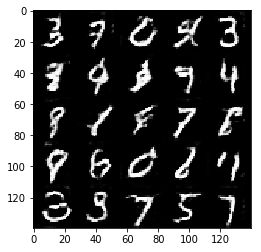

In [37]:
batch_size = 100
z_dim = 200
learning_rate = 0.0003
beta1 = 0.5


"""
DON'T MODcIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))

with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1 Step:10... Discriminator Loss: 2.8054... Generator Loss: 0.1036
Epoch 1/1 Step:20... Discriminator Loss: 0.3090... Generator Loss: 2.4947
Epoch 1/1 Step:30... Discriminator Loss: 4.5270... Generator Loss: 0.0292
Epoch 1/1 Step:40... Discriminator Loss: 0.4220... Generator Loss: 4.7317
Epoch 1/1 Step:50... Discriminator Loss: 1.9899... Generator Loss: 3.5390
Epoch 1/1 Step:60... Discriminator Loss: 1.7026... Generator Loss: 0.6051
Epoch 1/1 Step:70... Discriminator Loss: 1.2803... Generator Loss: 1.6237
Epoch 1/1 Step:80... Discriminator Loss: 1.5440... Generator Loss: 0.5356
Epoch 1/1 Step:90... Discriminator Loss: 1.0863... Generator Loss: 1.9983
Epoch 1/1 Step:100... Discriminator Loss: 1.2976... Generator Loss: 0.7073


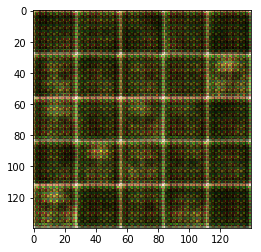

Epoch 1/1 Step:110... Discriminator Loss: 2.2895... Generator Loss: 0.1711
Epoch 1/1 Step:120... Discriminator Loss: 1.5746... Generator Loss: 0.4506
Epoch 1/1 Step:130... Discriminator Loss: 1.5066... Generator Loss: 0.7253
Epoch 1/1 Step:140... Discriminator Loss: 1.6919... Generator Loss: 0.4187
Epoch 1/1 Step:150... Discriminator Loss: 1.4205... Generator Loss: 0.7399
Epoch 1/1 Step:160... Discriminator Loss: 1.4438... Generator Loss: 1.3194
Epoch 1/1 Step:170... Discriminator Loss: 1.4463... Generator Loss: 1.3695
Epoch 1/1 Step:180... Discriminator Loss: 2.3271... Generator Loss: 0.1569
Epoch 1/1 Step:190... Discriminator Loss: 1.2512... Generator Loss: 1.0458
Epoch 1/1 Step:200... Discriminator Loss: 1.9205... Generator Loss: 0.9842


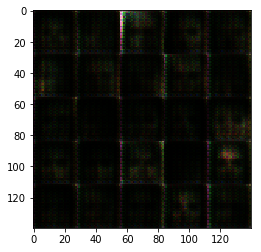

Epoch 1/1 Step:210... Discriminator Loss: 1.1111... Generator Loss: 1.1819
Epoch 1/1 Step:220... Discriminator Loss: 1.3996... Generator Loss: 0.6742
Epoch 1/1 Step:230... Discriminator Loss: 1.7084... Generator Loss: 0.5054
Epoch 1/1 Step:240... Discriminator Loss: 1.9533... Generator Loss: 0.3172
Epoch 1/1 Step:250... Discriminator Loss: 1.1477... Generator Loss: 0.9489
Epoch 1/1 Step:260... Discriminator Loss: 1.6652... Generator Loss: 0.4006
Epoch 1/1 Step:270... Discriminator Loss: 1.4590... Generator Loss: 0.6838
Epoch 1/1 Step:280... Discriminator Loss: 1.9628... Generator Loss: 0.5218
Epoch 1/1 Step:290... Discriminator Loss: 1.2395... Generator Loss: 0.8808
Epoch 1/1 Step:300... Discriminator Loss: 1.4440... Generator Loss: 0.6518


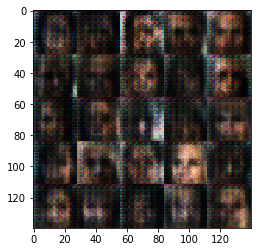

Epoch 1/1 Step:310... Discriminator Loss: 1.8539... Generator Loss: 0.4432
Epoch 1/1 Step:320... Discriminator Loss: 1.5230... Generator Loss: 0.5751
Epoch 1/1 Step:330... Discriminator Loss: 1.7855... Generator Loss: 0.3896
Epoch 1/1 Step:340... Discriminator Loss: 1.6120... Generator Loss: 0.5367
Epoch 1/1 Step:350... Discriminator Loss: 2.1484... Generator Loss: 0.2455
Epoch 1/1 Step:360... Discriminator Loss: 1.3169... Generator Loss: 0.6456
Epoch 1/1 Step:370... Discriminator Loss: 1.8430... Generator Loss: 0.4460
Epoch 1/1 Step:380... Discriminator Loss: 1.7882... Generator Loss: 0.5404
Epoch 1/1 Step:390... Discriminator Loss: 1.5197... Generator Loss: 0.5675
Epoch 1/1 Step:400... Discriminator Loss: 1.4943... Generator Loss: 0.7416


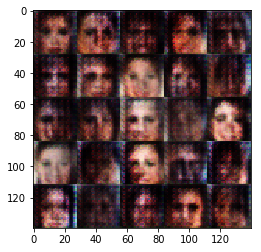

Epoch 1/1 Step:410... Discriminator Loss: 1.6191... Generator Loss: 0.5983
Epoch 1/1 Step:420... Discriminator Loss: 1.5444... Generator Loss: 0.6146
Epoch 1/1 Step:430... Discriminator Loss: 1.6962... Generator Loss: 0.4704
Epoch 1/1 Step:440... Discriminator Loss: 1.4392... Generator Loss: 0.8322
Epoch 1/1 Step:450... Discriminator Loss: 1.2284... Generator Loss: 0.8278
Epoch 1/1 Step:460... Discriminator Loss: 1.3800... Generator Loss: 0.8055
Epoch 1/1 Step:470... Discriminator Loss: 1.7432... Generator Loss: 0.3592
Epoch 1/1 Step:480... Discriminator Loss: 1.5601... Generator Loss: 0.5746
Epoch 1/1 Step:490... Discriminator Loss: 1.5741... Generator Loss: 0.4237
Epoch 1/1 Step:500... Discriminator Loss: 1.5757... Generator Loss: 0.5868


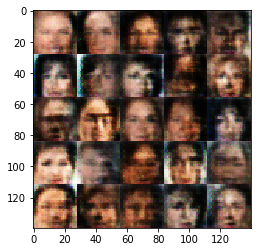

Epoch 1/1 Step:510... Discriminator Loss: 1.5087... Generator Loss: 0.4351
Epoch 1/1 Step:520... Discriminator Loss: 1.5320... Generator Loss: 0.5931
Epoch 1/1 Step:530... Discriminator Loss: 1.5952... Generator Loss: 0.4252
Epoch 1/1 Step:540... Discriminator Loss: 1.5412... Generator Loss: 0.6429
Epoch 1/1 Step:550... Discriminator Loss: 1.3692... Generator Loss: 0.5969
Epoch 1/1 Step:560... Discriminator Loss: 1.4885... Generator Loss: 0.4597
Epoch 1/1 Step:570... Discriminator Loss: 1.5310... Generator Loss: 0.3706
Epoch 1/1 Step:580... Discriminator Loss: 1.4985... Generator Loss: 0.4245
Epoch 1/1 Step:590... Discriminator Loss: 1.4760... Generator Loss: 0.4690
Epoch 1/1 Step:600... Discriminator Loss: 1.3628... Generator Loss: 0.6611


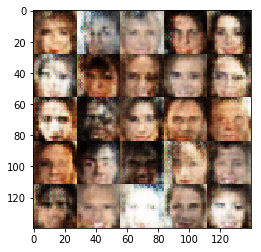

Epoch 1/1 Step:610... Discriminator Loss: 1.4051... Generator Loss: 0.4804
Epoch 1/1 Step:620... Discriminator Loss: 1.2509... Generator Loss: 0.8373
Epoch 1/1 Step:630... Discriminator Loss: 1.3211... Generator Loss: 0.7887
Epoch 1/1 Step:640... Discriminator Loss: 1.2945... Generator Loss: 0.5552
Epoch 1/1 Step:650... Discriminator Loss: 1.3537... Generator Loss: 0.5683
Epoch 1/1 Step:660... Discriminator Loss: 1.4658... Generator Loss: 0.6495
Epoch 1/1 Step:670... Discriminator Loss: 1.4779... Generator Loss: 0.4448
Epoch 1/1 Step:680... Discriminator Loss: 1.7217... Generator Loss: 0.3622
Epoch 1/1 Step:690... Discriminator Loss: 1.6029... Generator Loss: 0.4607
Epoch 1/1 Step:700... Discriminator Loss: 1.4996... Generator Loss: 0.6496


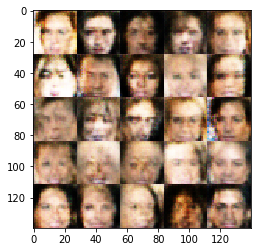

Epoch 1/1 Step:710... Discriminator Loss: 1.4871... Generator Loss: 0.5913
Epoch 1/1 Step:720... Discriminator Loss: 1.3689... Generator Loss: 0.5403
Epoch 1/1 Step:730... Discriminator Loss: 1.6958... Generator Loss: 0.3561
Epoch 1/1 Step:740... Discriminator Loss: 1.6938... Generator Loss: 0.4259
Epoch 1/1 Step:750... Discriminator Loss: 1.2592... Generator Loss: 0.5650
Epoch 1/1 Step:760... Discriminator Loss: 1.3403... Generator Loss: 0.7000
Epoch 1/1 Step:770... Discriminator Loss: 1.2638... Generator Loss: 0.5602
Epoch 1/1 Step:780... Discriminator Loss: 1.4246... Generator Loss: 0.5892
Epoch 1/1 Step:790... Discriminator Loss: 1.5671... Generator Loss: 0.3635
Epoch 1/1 Step:800... Discriminator Loss: 1.4105... Generator Loss: 0.7556


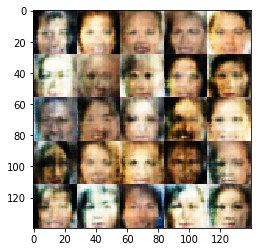

Epoch 1/1 Step:810... Discriminator Loss: 1.4699... Generator Loss: 0.4020
Epoch 1/1 Step:820... Discriminator Loss: 1.4356... Generator Loss: 0.5852
Epoch 1/1 Step:830... Discriminator Loss: 1.5889... Generator Loss: 0.4283
Epoch 1/1 Step:840... Discriminator Loss: 1.3131... Generator Loss: 0.8417
Epoch 1/1 Step:850... Discriminator Loss: 1.1897... Generator Loss: 0.8088
Epoch 1/1 Step:860... Discriminator Loss: 1.3573... Generator Loss: 0.6727
Epoch 1/1 Step:870... Discriminator Loss: 1.4045... Generator Loss: 0.4658
Epoch 1/1 Step:880... Discriminator Loss: 1.1791... Generator Loss: 0.6734
Epoch 1/1 Step:890... Discriminator Loss: 1.5164... Generator Loss: 0.4004
Epoch 1/1 Step:900... Discriminator Loss: 1.3585... Generator Loss: 0.6578


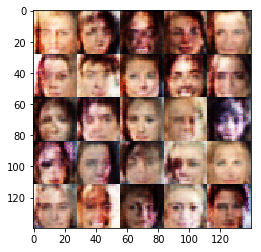

Epoch 1/1 Step:910... Discriminator Loss: 1.5211... Generator Loss: 0.3189
Epoch 1/1 Step:920... Discriminator Loss: 1.4282... Generator Loss: 0.5382
Epoch 1/1 Step:930... Discriminator Loss: 1.2679... Generator Loss: 0.5218
Epoch 1/1 Step:940... Discriminator Loss: 1.4471... Generator Loss: 0.5301
Epoch 1/1 Step:950... Discriminator Loss: 1.6490... Generator Loss: 0.2933
Epoch 1/1 Step:960... Discriminator Loss: 1.3465... Generator Loss: 0.8977
Epoch 1/1 Step:970... Discriminator Loss: 1.2916... Generator Loss: 0.4991
Epoch 1/1 Step:980... Discriminator Loss: 1.4733... Generator Loss: 0.4410
Epoch 1/1 Step:990... Discriminator Loss: 1.4233... Generator Loss: 0.4774
Epoch 1/1 Step:1000... Discriminator Loss: 1.3323... Generator Loss: 0.4635


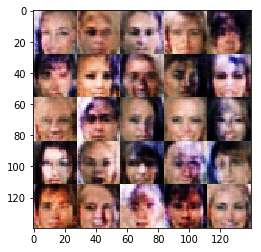

Epoch 1/1 Step:1010... Discriminator Loss: 1.4834... Generator Loss: 0.5266
Epoch 1/1 Step:1020... Discriminator Loss: 1.1031... Generator Loss: 0.8652
Epoch 1/1 Step:1030... Discriminator Loss: 1.1096... Generator Loss: 0.9004
Epoch 1/1 Step:1040... Discriminator Loss: 1.4515... Generator Loss: 0.5731
Epoch 1/1 Step:1050... Discriminator Loss: 1.5589... Generator Loss: 0.4200
Epoch 1/1 Step:1060... Discriminator Loss: 1.4284... Generator Loss: 0.4066
Epoch 1/1 Step:1070... Discriminator Loss: 1.4992... Generator Loss: 0.6693
Epoch 1/1 Step:1080... Discriminator Loss: 1.4387... Generator Loss: 0.5362
Epoch 1/1 Step:1090... Discriminator Loss: 1.1474... Generator Loss: 0.7140
Epoch 1/1 Step:1100... Discriminator Loss: 1.7164... Generator Loss: 0.4134


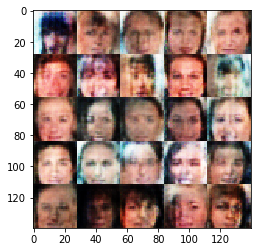

Epoch 1/1 Step:1110... Discriminator Loss: 1.2905... Generator Loss: 0.8231
Epoch 1/1 Step:1120... Discriminator Loss: 1.5607... Generator Loss: 0.4159
Epoch 1/1 Step:1130... Discriminator Loss: 1.6703... Generator Loss: 0.6067
Epoch 1/1 Step:1140... Discriminator Loss: 1.6288... Generator Loss: 0.3657
Epoch 1/1 Step:1150... Discriminator Loss: 1.5529... Generator Loss: 0.4385
Epoch 1/1 Step:1160... Discriminator Loss: 1.0970... Generator Loss: 0.6084
Epoch 1/1 Step:1170... Discriminator Loss: 1.4884... Generator Loss: 0.6435
Epoch 1/1 Step:1180... Discriminator Loss: 1.1973... Generator Loss: 0.8127
Epoch 1/1 Step:1190... Discriminator Loss: 1.2566... Generator Loss: 0.5857
Epoch 1/1 Step:1200... Discriminator Loss: 1.3522... Generator Loss: 0.5563


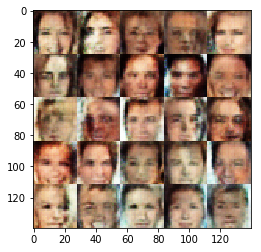

Epoch 1/1 Step:1210... Discriminator Loss: 1.5230... Generator Loss: 0.7902
Epoch 1/1 Step:1220... Discriminator Loss: 1.5014... Generator Loss: 0.4607
Epoch 1/1 Step:1230... Discriminator Loss: 1.8166... Generator Loss: 0.3224
Epoch 1/1 Step:1240... Discriminator Loss: 1.3351... Generator Loss: 0.7849
Epoch 1/1 Step:1250... Discriminator Loss: 1.3293... Generator Loss: 0.5766
Epoch 1/1 Step:1260... Discriminator Loss: 1.4798... Generator Loss: 0.6461
Epoch 1/1 Step:1270... Discriminator Loss: 1.4789... Generator Loss: 0.5580
Epoch 1/1 Step:1280... Discriminator Loss: 1.4061... Generator Loss: 0.5494
Epoch 1/1 Step:1290... Discriminator Loss: 1.2890... Generator Loss: 0.9466
Epoch 1/1 Step:1300... Discriminator Loss: 1.5798... Generator Loss: 0.4475


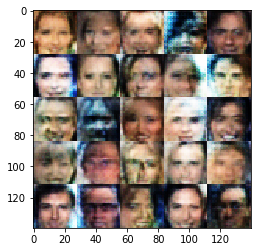

Epoch 1/1 Step:1310... Discriminator Loss: 1.7906... Generator Loss: 0.3463
Epoch 1/1 Step:1320... Discriminator Loss: 1.1487... Generator Loss: 0.7856
Epoch 1/1 Step:1330... Discriminator Loss: 1.4566... Generator Loss: 0.4866
Epoch 1/1 Step:1340... Discriminator Loss: 1.2471... Generator Loss: 0.6717
Epoch 1/1 Step:1350... Discriminator Loss: 1.7481... Generator Loss: 0.3678
Epoch 1/1 Step:1360... Discriminator Loss: 1.1940... Generator Loss: 0.7001
Epoch 1/1 Step:1370... Discriminator Loss: 1.2425... Generator Loss: 0.6771
Epoch 1/1 Step:1380... Discriminator Loss: 1.2826... Generator Loss: 0.5889
Epoch 1/1 Step:1390... Discriminator Loss: 1.5012... Generator Loss: 0.5135
Epoch 1/1 Step:1400... Discriminator Loss: 1.1764... Generator Loss: 0.6971


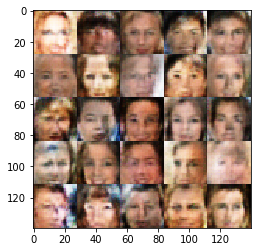

Epoch 1/1 Step:1410... Discriminator Loss: 1.4701... Generator Loss: 0.4307
Epoch 1/1 Step:1420... Discriminator Loss: 1.5119... Generator Loss: 0.4995
Epoch 1/1 Step:1430... Discriminator Loss: 1.2497... Generator Loss: 0.7654
Epoch 1/1 Step:1440... Discriminator Loss: 1.4405... Generator Loss: 0.4511
Epoch 1/1 Step:1450... Discriminator Loss: 1.6426... Generator Loss: 0.3907
Epoch 1/1 Step:1460... Discriminator Loss: 1.3203... Generator Loss: 0.6859
Epoch 1/1 Step:1470... Discriminator Loss: 1.4559... Generator Loss: 0.5783
Epoch 1/1 Step:1480... Discriminator Loss: 1.4129... Generator Loss: 0.6554
Epoch 1/1 Step:1490... Discriminator Loss: 1.2963... Generator Loss: 0.7801
Epoch 1/1 Step:1500... Discriminator Loss: 1.4494... Generator Loss: 0.4216


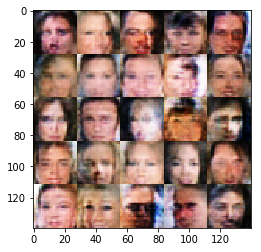

Epoch 1/1 Step:1510... Discriminator Loss: 1.4027... Generator Loss: 0.7137
Epoch 1/1 Step:1520... Discriminator Loss: 1.4223... Generator Loss: 0.8171
Epoch 1/1 Step:1530... Discriminator Loss: 1.2409... Generator Loss: 0.6517
Epoch 1/1 Step:1540... Discriminator Loss: 1.2293... Generator Loss: 0.6969
Epoch 1/1 Step:1550... Discriminator Loss: 1.2586... Generator Loss: 0.5269
Epoch 1/1 Step:1560... Discriminator Loss: 1.3784... Generator Loss: 0.5374
Epoch 1/1 Step:1570... Discriminator Loss: 1.3592... Generator Loss: 0.6003
Epoch 1/1 Step:1580... Discriminator Loss: 1.3716... Generator Loss: 0.5355
Epoch 1/1 Step:1590... Discriminator Loss: 1.5502... Generator Loss: 0.4290
Epoch 1/1 Step:1600... Discriminator Loss: 1.4209... Generator Loss: 0.5719


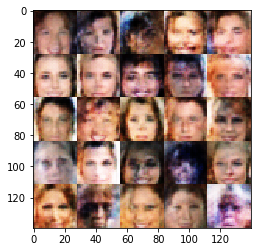

Epoch 1/1 Step:1610... Discriminator Loss: 1.4498... Generator Loss: 0.4847
Epoch 1/1 Step:1620... Discriminator Loss: 1.1469... Generator Loss: 0.6570
Epoch 1/1 Step:1630... Discriminator Loss: 1.5316... Generator Loss: 0.4829
Epoch 1/1 Step:1640... Discriminator Loss: 1.7613... Generator Loss: 0.2808
Epoch 1/1 Step:1650... Discriminator Loss: 1.4355... Generator Loss: 0.5002
Epoch 1/1 Step:1660... Discriminator Loss: 1.5319... Generator Loss: 0.4313
Epoch 1/1 Step:1670... Discriminator Loss: 1.6013... Generator Loss: 0.4531
Epoch 1/1 Step:1680... Discriminator Loss: 1.3055... Generator Loss: 0.6547
Epoch 1/1 Step:1690... Discriminator Loss: 1.5392... Generator Loss: 0.4536
Epoch 1/1 Step:1700... Discriminator Loss: 1.2342... Generator Loss: 0.5484


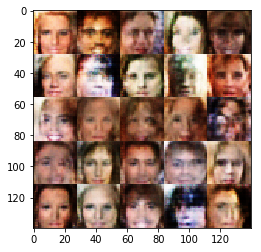

Epoch 1/1 Step:1710... Discriminator Loss: 1.5662... Generator Loss: 0.3684
Epoch 1/1 Step:1720... Discriminator Loss: 1.3647... Generator Loss: 0.5786
Epoch 1/1 Step:1730... Discriminator Loss: 1.3164... Generator Loss: 0.5808
Epoch 1/1 Step:1740... Discriminator Loss: 1.3706... Generator Loss: 0.5530
Epoch 1/1 Step:1750... Discriminator Loss: 1.6117... Generator Loss: 0.3382
Epoch 1/1 Step:1760... Discriminator Loss: 1.4081... Generator Loss: 0.6086
Epoch 1/1 Step:1770... Discriminator Loss: 1.2842... Generator Loss: 0.5663
Epoch 1/1 Step:1780... Discriminator Loss: 1.5489... Generator Loss: 0.3536
Epoch 1/1 Step:1790... Discriminator Loss: 1.2993... Generator Loss: 0.8487
Epoch 1/1 Step:1800... Discriminator Loss: 1.3153... Generator Loss: 0.5990


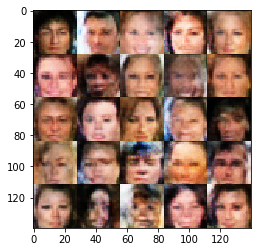

Epoch 1/1 Step:1810... Discriminator Loss: 1.4308... Generator Loss: 0.4030
Epoch 1/1 Step:1820... Discriminator Loss: 1.5279... Generator Loss: 0.5286
Epoch 1/1 Step:1830... Discriminator Loss: 1.3974... Generator Loss: 0.6142
Epoch 1/1 Step:1840... Discriminator Loss: 1.7399... Generator Loss: 0.3389
Epoch 1/1 Step:1850... Discriminator Loss: 1.2236... Generator Loss: 0.7314
Epoch 1/1 Step:1860... Discriminator Loss: 1.5516... Generator Loss: 0.4547
Epoch 1/1 Step:1870... Discriminator Loss: 1.7638... Generator Loss: 0.3395
Epoch 1/1 Step:1880... Discriminator Loss: 1.2312... Generator Loss: 0.6969
Epoch 1/1 Step:1890... Discriminator Loss: 1.6346... Generator Loss: 0.3882
Epoch 1/1 Step:1900... Discriminator Loss: 1.1348... Generator Loss: 0.6348


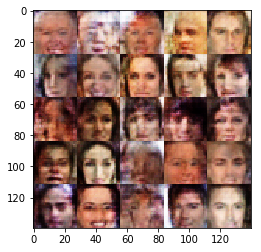

Epoch 1/1 Step:1910... Discriminator Loss: 1.4789... Generator Loss: 0.3699
Epoch 1/1 Step:1920... Discriminator Loss: 1.5322... Generator Loss: 0.4203
Epoch 1/1 Step:1930... Discriminator Loss: 1.7181... Generator Loss: 0.3403
Epoch 1/1 Step:1940... Discriminator Loss: 1.6623... Generator Loss: 0.3795
Epoch 1/1 Step:1950... Discriminator Loss: 1.4027... Generator Loss: 0.3897
Epoch 1/1 Step:1960... Discriminator Loss: 1.6354... Generator Loss: 0.3084
Epoch 1/1 Step:1970... Discriminator Loss: 1.1776... Generator Loss: 0.5939
Epoch 1/1 Step:1980... Discriminator Loss: 1.5810... Generator Loss: 0.4999
Epoch 1/1 Step:1990... Discriminator Loss: 1.0982... Generator Loss: 0.8416
Epoch 1/1 Step:2000... Discriminator Loss: 1.3695... Generator Loss: 0.4993


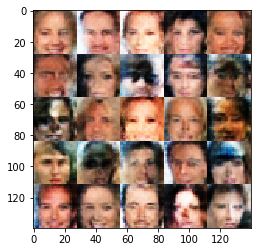

Epoch 1/1 Step:2010... Discriminator Loss: 1.2367... Generator Loss: 0.6300
Epoch 1/1 Step:2020... Discriminator Loss: 1.2360... Generator Loss: 0.7457
Epoch 1/1 Step:2030... Discriminator Loss: 1.3833... Generator Loss: 0.4219
Epoch 1/1 Step:2040... Discriminator Loss: 1.1639... Generator Loss: 0.6361
Epoch 1/1 Step:2050... Discriminator Loss: 1.5453... Generator Loss: 0.3365
Epoch 1/1 Step:2060... Discriminator Loss: 1.0714... Generator Loss: 0.7244
Epoch 1/1 Step:2070... Discriminator Loss: 1.3782... Generator Loss: 0.6723
Epoch 1/1 Step:2080... Discriminator Loss: 1.6204... Generator Loss: 0.4418
Epoch 1/1 Step:2090... Discriminator Loss: 1.3603... Generator Loss: 0.5113
Epoch 1/1 Step:2100... Discriminator Loss: 1.2146... Generator Loss: 0.6385


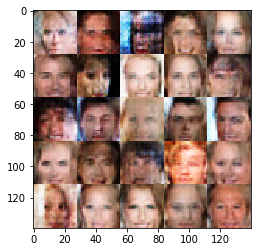

Epoch 1/1 Step:2110... Discriminator Loss: 1.1287... Generator Loss: 0.8285
Epoch 1/1 Step:2120... Discriminator Loss: 1.2833... Generator Loss: 0.5819
Epoch 1/1 Step:2130... Discriminator Loss: 1.4517... Generator Loss: 0.7476
Epoch 1/1 Step:2140... Discriminator Loss: 1.6214... Generator Loss: 0.4163
Epoch 1/1 Step:2150... Discriminator Loss: 1.2964... Generator Loss: 0.6232
Epoch 1/1 Step:2160... Discriminator Loss: 0.9923... Generator Loss: 0.7324
Epoch 1/1 Step:2170... Discriminator Loss: 1.5962... Generator Loss: 0.3443
Epoch 1/1 Step:2180... Discriminator Loss: 1.5131... Generator Loss: 0.5674
Epoch 1/1 Step:2190... Discriminator Loss: 1.1599... Generator Loss: 0.8219
Epoch 1/1 Step:2200... Discriminator Loss: 1.0137... Generator Loss: 1.0219


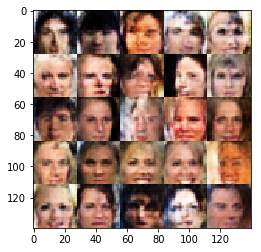

Epoch 1/1 Step:2210... Discriminator Loss: 1.2263... Generator Loss: 0.6708
Epoch 1/1 Step:2220... Discriminator Loss: 1.1336... Generator Loss: 0.7621
Epoch 1/1 Step:2230... Discriminator Loss: 1.3301... Generator Loss: 0.5491
Epoch 1/1 Step:2240... Discriminator Loss: 1.7140... Generator Loss: 0.2796
Epoch 1/1 Step:2250... Discriminator Loss: 1.4960... Generator Loss: 0.4492
Epoch 1/1 Step:2260... Discriminator Loss: 1.4592... Generator Loss: 0.4396
Epoch 1/1 Step:2270... Discriminator Loss: 1.4036... Generator Loss: 0.4965
Epoch 1/1 Step:2280... Discriminator Loss: 1.4587... Generator Loss: 0.4070
Epoch 1/1 Step:2290... Discriminator Loss: 1.4480... Generator Loss: 0.3657
Epoch 1/1 Step:2300... Discriminator Loss: 1.5857... Generator Loss: 0.4147


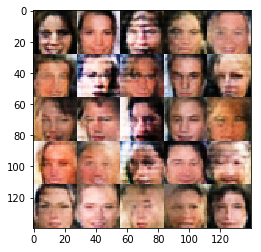

Epoch 1/1 Step:2310... Discriminator Loss: 1.5145... Generator Loss: 0.4475
Epoch 1/1 Step:2320... Discriminator Loss: 1.3146... Generator Loss: 0.7375
Epoch 1/1 Step:2330... Discriminator Loss: 1.3201... Generator Loss: 0.5900
Epoch 1/1 Step:2340... Discriminator Loss: 1.6102... Generator Loss: 0.3206
Epoch 1/1 Step:2350... Discriminator Loss: 1.4498... Generator Loss: 0.4734
Epoch 1/1 Step:2360... Discriminator Loss: 1.5519... Generator Loss: 0.8619
Epoch 1/1 Step:2370... Discriminator Loss: 1.6045... Generator Loss: 0.3397
Epoch 1/1 Step:2380... Discriminator Loss: 1.4902... Generator Loss: 0.3560
Epoch 1/1 Step:2390... Discriminator Loss: 1.2337... Generator Loss: 0.7766
Epoch 1/1 Step:2400... Discriminator Loss: 1.2965... Generator Loss: 0.7386


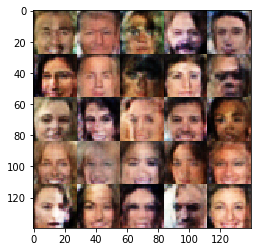

Epoch 1/1 Step:2410... Discriminator Loss: 1.5643... Generator Loss: 0.2921
Epoch 1/1 Step:2420... Discriminator Loss: 1.3717... Generator Loss: 0.5054
Epoch 1/1 Step:2430... Discriminator Loss: 1.3946... Generator Loss: 0.5674
Epoch 1/1 Step:2440... Discriminator Loss: 1.5462... Generator Loss: 0.3884
Epoch 1/1 Step:2450... Discriminator Loss: 1.0774... Generator Loss: 0.6183
Epoch 1/1 Step:2460... Discriminator Loss: 1.5070... Generator Loss: 0.3956
Epoch 1/1 Step:2470... Discriminator Loss: 1.2685... Generator Loss: 0.5187
Epoch 1/1 Step:2480... Discriminator Loss: 1.6526... Generator Loss: 0.2950
Epoch 1/1 Step:2490... Discriminator Loss: 1.4737... Generator Loss: 0.4441
Epoch 1/1 Step:2500... Discriminator Loss: 1.2310... Generator Loss: 0.9308


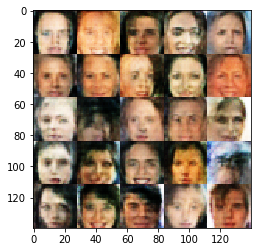

Epoch 1/1 Step:2510... Discriminator Loss: 1.1908... Generator Loss: 0.5428
Epoch 1/1 Step:2520... Discriminator Loss: 1.2894... Generator Loss: 0.6939
Epoch 1/1 Step:2530... Discriminator Loss: 1.4335... Generator Loss: 0.5438
Epoch 1/1 Step:2540... Discriminator Loss: 1.5698... Generator Loss: 0.6156
Epoch 1/1 Step:2550... Discriminator Loss: 1.4190... Generator Loss: 0.4553
Epoch 1/1 Step:2560... Discriminator Loss: 1.3813... Generator Loss: 0.5746
Epoch 1/1 Step:2570... Discriminator Loss: 1.6654... Generator Loss: 0.3162
Epoch 1/1 Step:2580... Discriminator Loss: 1.5289... Generator Loss: 0.3360
Epoch 1/1 Step:2590... Discriminator Loss: 1.3662... Generator Loss: 0.4291
Epoch 1/1 Step:2600... Discriminator Loss: 1.4135... Generator Loss: 0.4344


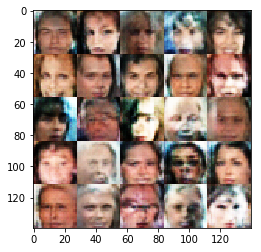

Epoch 1/1 Step:2610... Discriminator Loss: 1.4829... Generator Loss: 0.3702
Epoch 1/1 Step:2620... Discriminator Loss: 1.2412... Generator Loss: 0.5505
Epoch 1/1 Step:2630... Discriminator Loss: 1.7187... Generator Loss: 0.2710
Epoch 1/1 Step:2640... Discriminator Loss: 1.2390... Generator Loss: 0.5684
Epoch 1/1 Step:2650... Discriminator Loss: 1.4003... Generator Loss: 0.5274
Epoch 1/1 Step:2660... Discriminator Loss: 1.7729... Generator Loss: 0.2670
Epoch 1/1 Step:2670... Discriminator Loss: 1.4714... Generator Loss: 0.4676
Epoch 1/1 Step:2680... Discriminator Loss: 1.4691... Generator Loss: 0.4183
Epoch 1/1 Step:2690... Discriminator Loss: 1.2362... Generator Loss: 0.6161
Epoch 1/1 Step:2700... Discriminator Loss: 1.5619... Generator Loss: 0.4148


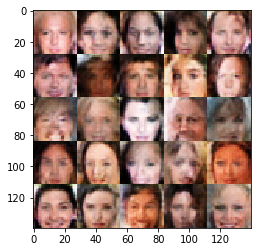

Epoch 1/1 Step:2710... Discriminator Loss: 1.3359... Generator Loss: 0.4480
Epoch 1/1 Step:2720... Discriminator Loss: 1.2041... Generator Loss: 0.5192
Epoch 1/1 Step:2730... Discriminator Loss: 1.4540... Generator Loss: 0.4339
Epoch 1/1 Step:2740... Discriminator Loss: 1.1960... Generator Loss: 0.8054
Epoch 1/1 Step:2750... Discriminator Loss: 1.3337... Generator Loss: 0.4646
Epoch 1/1 Step:2760... Discriminator Loss: 1.1168... Generator Loss: 0.6606
Epoch 1/1 Step:2770... Discriminator Loss: 1.3829... Generator Loss: 0.4465
Epoch 1/1 Step:2780... Discriminator Loss: 1.4292... Generator Loss: 0.6198
Epoch 1/1 Step:2790... Discriminator Loss: 1.3464... Generator Loss: 0.4510
Epoch 1/1 Step:2800... Discriminator Loss: 1.3898... Generator Loss: 0.4405


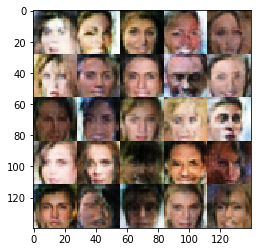

Epoch 1/1 Step:2810... Discriminator Loss: 1.3827... Generator Loss: 0.4215
Epoch 1/1 Step:2820... Discriminator Loss: 1.2828... Generator Loss: 0.8190
Epoch 1/1 Step:2830... Discriminator Loss: 1.4820... Generator Loss: 0.4367
Epoch 1/1 Step:2840... Discriminator Loss: 1.3111... Generator Loss: 0.6234
Epoch 1/1 Step:2850... Discriminator Loss: 1.5776... Generator Loss: 0.3511
Epoch 1/1 Step:2860... Discriminator Loss: 1.4055... Generator Loss: 0.5977
Epoch 1/1 Step:2870... Discriminator Loss: 1.6833... Generator Loss: 0.3827
Epoch 1/1 Step:2880... Discriminator Loss: 1.5698... Generator Loss: 0.4225
Epoch 1/1 Step:2890... Discriminator Loss: 1.1962... Generator Loss: 0.9388
Epoch 1/1 Step:2900... Discriminator Loss: 1.1796... Generator Loss: 0.6288


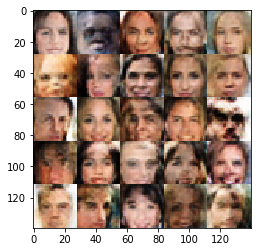

Epoch 1/1 Step:2910... Discriminator Loss: 1.3153... Generator Loss: 0.4764
Epoch 1/1 Step:2920... Discriminator Loss: 1.3090... Generator Loss: 0.6921
Epoch 1/1 Step:2930... Discriminator Loss: 1.5104... Generator Loss: 0.5299
Epoch 1/1 Step:2940... Discriminator Loss: 1.2643... Generator Loss: 0.5456
Epoch 1/1 Step:2950... Discriminator Loss: 1.4340... Generator Loss: 0.4678
Epoch 1/1 Step:2960... Discriminator Loss: 1.4594... Generator Loss: 0.4339
Epoch 1/1 Step:2970... Discriminator Loss: 1.2097... Generator Loss: 0.7579
Epoch 1/1 Step:2980... Discriminator Loss: 1.6134... Generator Loss: 0.4126
Epoch 1/1 Step:2990... Discriminator Loss: 1.4212... Generator Loss: 0.7449
Epoch 1/1 Step:3000... Discriminator Loss: 1.1393... Generator Loss: 0.8595


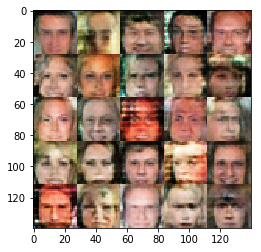

Epoch 1/1 Step:3010... Discriminator Loss: 1.4028... Generator Loss: 0.3977
Epoch 1/1 Step:3020... Discriminator Loss: 1.6059... Generator Loss: 0.3274
Epoch 1/1 Step:3030... Discriminator Loss: 1.4323... Generator Loss: 0.5214
Epoch 1/1 Step:3040... Discriminator Loss: 1.1532... Generator Loss: 0.7818
Epoch 1/1 Step:3050... Discriminator Loss: 1.2772... Generator Loss: 0.6022
Epoch 1/1 Step:3060... Discriminator Loss: 1.2463... Generator Loss: 0.5922
Epoch 1/1 Step:3070... Discriminator Loss: 1.4624... Generator Loss: 0.4122
Epoch 1/1 Step:3080... Discriminator Loss: 1.2684... Generator Loss: 1.1097
Epoch 1/1 Step:3090... Discriminator Loss: 1.4259... Generator Loss: 0.9182
Epoch 1/1 Step:3100... Discriminator Loss: 1.1164... Generator Loss: 0.6461


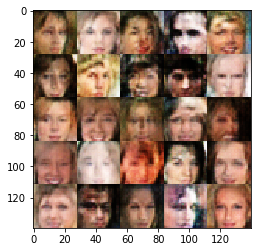

Epoch 1/1 Step:3110... Discriminator Loss: 1.6547... Generator Loss: 0.3330
Epoch 1/1 Step:3120... Discriminator Loss: 1.3011... Generator Loss: 0.5758
Epoch 1/1 Step:3130... Discriminator Loss: 1.2566... Generator Loss: 0.8420
Epoch 1/1 Step:3140... Discriminator Loss: 1.2415... Generator Loss: 0.6464
Epoch 1/1 Step:3150... Discriminator Loss: 1.2007... Generator Loss: 0.5976
Epoch 1/1 Step:3160... Discriminator Loss: 1.1491... Generator Loss: 0.5581
Epoch 1/1 Step:3170... Discriminator Loss: 1.4404... Generator Loss: 0.4280
Epoch 1/1 Step:3180... Discriminator Loss: 1.3101... Generator Loss: 0.4967
Epoch 1/1 Step:3190... Discriminator Loss: 1.3208... Generator Loss: 0.4884
Epoch 1/1 Step:3200... Discriminator Loss: 1.5833... Generator Loss: 0.3766


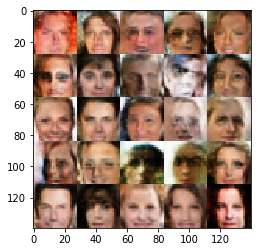

Epoch 1/1 Step:3210... Discriminator Loss: 1.5768... Generator Loss: 0.3478
Epoch 1/1 Step:3220... Discriminator Loss: 1.3209... Generator Loss: 0.6188
Epoch 1/1 Step:3230... Discriminator Loss: 1.3633... Generator Loss: 0.4828
Epoch 1/1 Step:3240... Discriminator Loss: 1.4906... Generator Loss: 0.3793
Epoch 1/1 Step:3250... Discriminator Loss: 1.3158... Generator Loss: 0.4692
Epoch 1/1 Step:3260... Discriminator Loss: 1.2996... Generator Loss: 0.5626
Epoch 1/1 Step:3270... Discriminator Loss: 1.2787... Generator Loss: 0.5815
Epoch 1/1 Step:3280... Discriminator Loss: 1.3987... Generator Loss: 0.4596
Epoch 1/1 Step:3290... Discriminator Loss: 1.6240... Generator Loss: 0.3387
Epoch 1/1 Step:3300... Discriminator Loss: 1.1331... Generator Loss: 0.5662


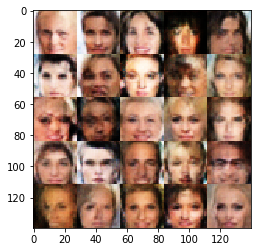

Epoch 1/1 Step:3310... Discriminator Loss: 1.4434... Generator Loss: 0.5367
Epoch 1/1 Step:3320... Discriminator Loss: 1.3820... Generator Loss: 0.5020
Epoch 1/1 Step:3330... Discriminator Loss: 1.6200... Generator Loss: 0.4833
Epoch 1/1 Step:3340... Discriminator Loss: 1.7755... Generator Loss: 0.2922
Epoch 1/1 Step:3350... Discriminator Loss: 1.5085... Generator Loss: 0.6247
Epoch 1/1 Step:3360... Discriminator Loss: 1.7925... Generator Loss: 0.3302
Epoch 1/1 Step:3370... Discriminator Loss: 1.1388... Generator Loss: 0.5611
Epoch 1/1 Step:3380... Discriminator Loss: 1.3062... Generator Loss: 0.5543
Epoch 1/1 Step:3390... Discriminator Loss: 1.2028... Generator Loss: 0.9329
Epoch 1/1 Step:3400... Discriminator Loss: 1.2693... Generator Loss: 0.7029


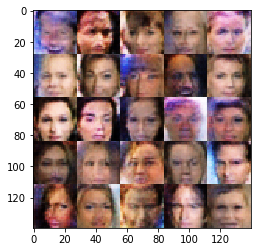

Epoch 1/1 Step:3410... Discriminator Loss: 1.2219... Generator Loss: 0.6598
Epoch 1/1 Step:3420... Discriminator Loss: 1.5704... Generator Loss: 0.2974
Epoch 1/1 Step:3430... Discriminator Loss: 1.7475... Generator Loss: 0.3139
Epoch 1/1 Step:3440... Discriminator Loss: 1.4041... Generator Loss: 0.4435
Epoch 1/1 Step:3450... Discriminator Loss: 1.5851... Generator Loss: 0.3349
Epoch 1/1 Step:3460... Discriminator Loss: 1.4717... Generator Loss: 0.4114
Epoch 1/1 Step:3470... Discriminator Loss: 1.6540... Generator Loss: 0.2784
Epoch 1/1 Step:3480... Discriminator Loss: 1.3999... Generator Loss: 0.4849
Epoch 1/1 Step:3490... Discriminator Loss: 1.0749... Generator Loss: 0.8682
Epoch 1/1 Step:3500... Discriminator Loss: 1.3891... Generator Loss: 0.4511


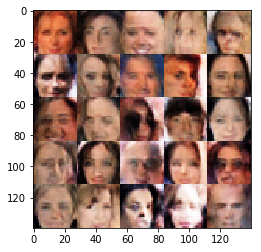

Epoch 1/1 Step:3510... Discriminator Loss: 1.2762... Generator Loss: 0.6740
Epoch 1/1 Step:3520... Discriminator Loss: 1.3051... Generator Loss: 0.5624
Epoch 1/1 Step:3530... Discriminator Loss: 2.2526... Generator Loss: 0.1736
Epoch 1/1 Step:3540... Discriminator Loss: 1.4369... Generator Loss: 0.4772
Epoch 1/1 Step:3550... Discriminator Loss: 1.3364... Generator Loss: 0.5207
Epoch 1/1 Step:3560... Discriminator Loss: 1.6026... Generator Loss: 0.4810
Epoch 1/1 Step:3570... Discriminator Loss: 1.3098... Generator Loss: 0.5899
Epoch 1/1 Step:3580... Discriminator Loss: 1.5181... Generator Loss: 0.4443
Epoch 1/1 Step:3590... Discriminator Loss: 1.3149... Generator Loss: 0.6625
Epoch 1/1 Step:3600... Discriminator Loss: 1.6429... Generator Loss: 0.3908


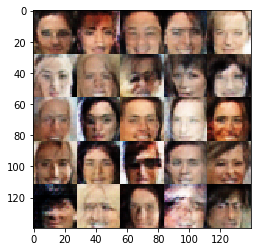

Epoch 1/1 Step:3610... Discriminator Loss: 1.3620... Generator Loss: 0.5348
Epoch 1/1 Step:3620... Discriminator Loss: 1.2780... Generator Loss: 0.5555
Epoch 1/1 Step:3630... Discriminator Loss: 1.3714... Generator Loss: 0.5383
Epoch 1/1 Step:3640... Discriminator Loss: 1.4066... Generator Loss: 0.7870
Epoch 1/1 Step:3650... Discriminator Loss: 1.8963... Generator Loss: 0.3673
Epoch 1/1 Step:3660... Discriminator Loss: 1.1011... Generator Loss: 0.8203
Epoch 1/1 Step:3670... Discriminator Loss: 1.6376... Generator Loss: 0.4591
Epoch 1/1 Step:3680... Discriminator Loss: 1.2877... Generator Loss: 0.7924
Epoch 1/1 Step:3690... Discriminator Loss: 1.5601... Generator Loss: 0.4187
Epoch 1/1 Step:3700... Discriminator Loss: 1.4967... Generator Loss: 0.4194


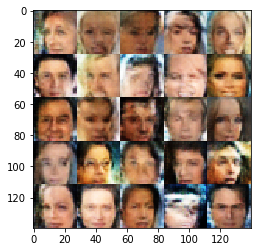

Epoch 1/1 Step:3710... Discriminator Loss: 1.1156... Generator Loss: 0.6112
Epoch 1/1 Step:3720... Discriminator Loss: 1.3930... Generator Loss: 0.4914
Epoch 1/1 Step:3730... Discriminator Loss: 1.5855... Generator Loss: 0.3303
Epoch 1/1 Step:3740... Discriminator Loss: 1.3100... Generator Loss: 0.6276
Epoch 1/1 Step:3750... Discriminator Loss: 1.3184... Generator Loss: 0.6230
Epoch 1/1 Step:3760... Discriminator Loss: 1.1853... Generator Loss: 0.5975
Epoch 1/1 Step:3770... Discriminator Loss: 1.6927... Generator Loss: 0.4071
Epoch 1/1 Step:3780... Discriminator Loss: 1.5949... Generator Loss: 0.4766
Epoch 1/1 Step:3790... Discriminator Loss: 1.1689... Generator Loss: 0.6346
Epoch 1/1 Step:3800... Discriminator Loss: 1.4809... Generator Loss: 0.4014


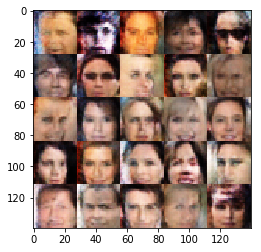

Epoch 1/1 Step:3810... Discriminator Loss: 1.1618... Generator Loss: 0.6966
Epoch 1/1 Step:3820... Discriminator Loss: 1.6387... Generator Loss: 0.3362
Epoch 1/1 Step:3830... Discriminator Loss: 1.4575... Generator Loss: 0.6539
Epoch 1/1 Step:3840... Discriminator Loss: 1.4157... Generator Loss: 0.4725
Epoch 1/1 Step:3850... Discriminator Loss: 1.4707... Generator Loss: 0.4542
Epoch 1/1 Step:3860... Discriminator Loss: 1.2003... Generator Loss: 0.8068
Epoch 1/1 Step:3870... Discriminator Loss: 1.5286... Generator Loss: 0.4488
Epoch 1/1 Step:3880... Discriminator Loss: 1.2243... Generator Loss: 0.5425
Epoch 1/1 Step:3890... Discriminator Loss: 1.5377... Generator Loss: 0.4638
Epoch 1/1 Step:3900... Discriminator Loss: 1.4448... Generator Loss: 0.4947


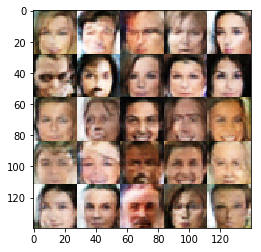

Epoch 1/1 Step:3910... Discriminator Loss: 1.2303... Generator Loss: 0.7068
Epoch 1/1 Step:3920... Discriminator Loss: 1.4791... Generator Loss: 0.4170
Epoch 1/1 Step:3930... Discriminator Loss: 1.2544... Generator Loss: 0.5529
Epoch 1/1 Step:3940... Discriminator Loss: 1.7558... Generator Loss: 0.3001
Epoch 1/1 Step:3950... Discriminator Loss: 1.4269... Generator Loss: 0.4746
Epoch 1/1 Step:3960... Discriminator Loss: 1.6102... Generator Loss: 0.3277
Epoch 1/1 Step:3970... Discriminator Loss: 1.2644... Generator Loss: 0.6547
Epoch 1/1 Step:3980... Discriminator Loss: 1.3363... Generator Loss: 0.4522
Epoch 1/1 Step:3990... Discriminator Loss: 1.3879... Generator Loss: 0.5002
Epoch 1/1 Step:4000... Discriminator Loss: 1.1817... Generator Loss: 0.5582


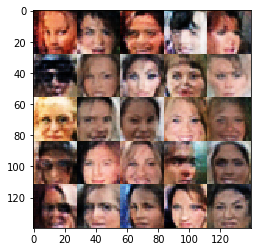

Epoch 1/1 Step:4010... Discriminator Loss: 1.3870... Generator Loss: 0.6859
Epoch 1/1 Step:4020... Discriminator Loss: 0.9758... Generator Loss: 0.7595
Epoch 1/1 Step:4030... Discriminator Loss: 1.3942... Generator Loss: 0.5554
Epoch 1/1 Step:4040... Discriminator Loss: 1.4247... Generator Loss: 0.5262
Epoch 1/1 Step:4050... Discriminator Loss: 1.1453... Generator Loss: 0.9146
Epoch 1/1 Step:4060... Discriminator Loss: 1.7464... Generator Loss: 0.2646
Epoch 1/1 Step:4070... Discriminator Loss: 1.6310... Generator Loss: 0.3947
Epoch 1/1 Step:4080... Discriminator Loss: 1.0744... Generator Loss: 0.6891
Epoch 1/1 Step:4090... Discriminator Loss: 1.4202... Generator Loss: 0.3781
Epoch 1/1 Step:4100... Discriminator Loss: 1.4306... Generator Loss: 0.4722


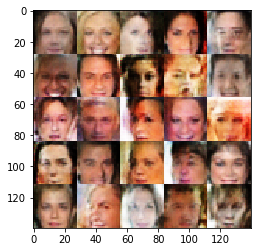

Epoch 1/1 Step:4110... Discriminator Loss: 1.6795... Generator Loss: 0.3115
Epoch 1/1 Step:4120... Discriminator Loss: 1.4252... Generator Loss: 0.4489
Epoch 1/1 Step:4130... Discriminator Loss: 1.5646... Generator Loss: 0.4890
Epoch 1/1 Step:4140... Discriminator Loss: 1.8593... Generator Loss: 0.2348
Epoch 1/1 Step:4150... Discriminator Loss: 1.5676... Generator Loss: 0.3893
Epoch 1/1 Step:4160... Discriminator Loss: 1.4288... Generator Loss: 0.7359
Epoch 1/1 Step:4170... Discriminator Loss: 1.1787... Generator Loss: 0.6966
Epoch 1/1 Step:4180... Discriminator Loss: 1.5318... Generator Loss: 0.5240
Epoch 1/1 Step:4190... Discriminator Loss: 1.4419... Generator Loss: 0.5202
Epoch 1/1 Step:4200... Discriminator Loss: 1.4782... Generator Loss: 0.8436


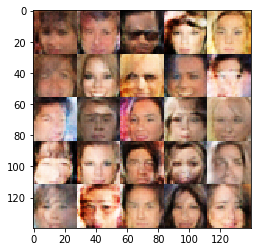

Epoch 1/1 Step:4210... Discriminator Loss: 1.6378... Generator Loss: 0.3182
Epoch 1/1 Step:4220... Discriminator Loss: 1.6692... Generator Loss: 0.4647
Epoch 1/1 Step:4230... Discriminator Loss: 1.4367... Generator Loss: 0.5720
Epoch 1/1 Step:4240... Discriminator Loss: 1.4927... Generator Loss: 0.3712
Epoch 1/1 Step:4250... Discriminator Loss: 1.5366... Generator Loss: 0.5155
Epoch 1/1 Step:4260... Discriminator Loss: 1.2910... Generator Loss: 0.5805
Epoch 1/1 Step:4270... Discriminator Loss: 1.3388... Generator Loss: 0.7462
Epoch 1/1 Step:4280... Discriminator Loss: 1.3232... Generator Loss: 0.6043
Epoch 1/1 Step:4290... Discriminator Loss: 1.4344... Generator Loss: 0.8115
Epoch 1/1 Step:4300... Discriminator Loss: 1.5591... Generator Loss: 0.4266


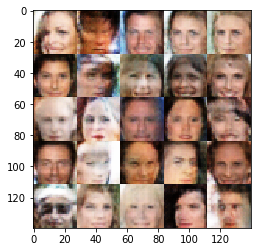

Epoch 1/1 Step:4310... Discriminator Loss: 1.3784... Generator Loss: 0.5519
Epoch 1/1 Step:4320... Discriminator Loss: 1.3537... Generator Loss: 0.4768
Epoch 1/1 Step:4330... Discriminator Loss: 1.4521... Generator Loss: 0.5365
Epoch 1/1 Step:4340... Discriminator Loss: 1.1898... Generator Loss: 0.5676
Epoch 1/1 Step:4350... Discriminator Loss: 1.4696... Generator Loss: 0.6074
Epoch 1/1 Step:4360... Discriminator Loss: 1.4374... Generator Loss: 0.3942
Epoch 1/1 Step:4370... Discriminator Loss: 1.2682... Generator Loss: 0.5722
Epoch 1/1 Step:4380... Discriminator Loss: 1.4646... Generator Loss: 0.6014
Epoch 1/1 Step:4390... Discriminator Loss: 1.2969... Generator Loss: 0.6150
Epoch 1/1 Step:4400... Discriminator Loss: 1.3108... Generator Loss: 0.5574


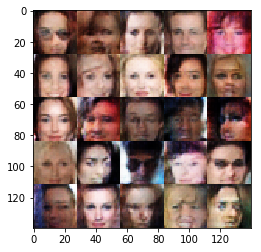

Epoch 1/1 Step:4410... Discriminator Loss: 1.2980... Generator Loss: 0.6728
Epoch 1/1 Step:4420... Discriminator Loss: 1.2661... Generator Loss: 0.5349
Epoch 1/1 Step:4430... Discriminator Loss: 1.3748... Generator Loss: 0.4444
Epoch 1/1 Step:4440... Discriminator Loss: 1.4706... Generator Loss: 0.3687
Epoch 1/1 Step:4450... Discriminator Loss: 1.3186... Generator Loss: 0.6851
Epoch 1/1 Step:4460... Discriminator Loss: 1.5414... Generator Loss: 0.4869
Epoch 1/1 Step:4470... Discriminator Loss: 1.3775... Generator Loss: 0.4708
Epoch 1/1 Step:4480... Discriminator Loss: 1.4371... Generator Loss: 0.4269
Epoch 1/1 Step:4490... Discriminator Loss: 1.5798... Generator Loss: 0.4185
Epoch 1/1 Step:4500... Discriminator Loss: 1.3075... Generator Loss: 0.5055


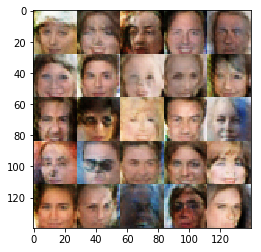

Epoch 1/1 Step:4510... Discriminator Loss: 1.4972... Generator Loss: 0.4731
Epoch 1/1 Step:4520... Discriminator Loss: 1.6594... Generator Loss: 0.3327
Epoch 1/1 Step:4530... Discriminator Loss: 1.3579... Generator Loss: 0.6490
Epoch 1/1 Step:4540... Discriminator Loss: 1.7023... Generator Loss: 0.4210
Epoch 1/1 Step:4550... Discriminator Loss: 1.5088... Generator Loss: 0.5687
Epoch 1/1 Step:4560... Discriminator Loss: 1.4693... Generator Loss: 0.4775
Epoch 1/1 Step:4570... Discriminator Loss: 1.4766... Generator Loss: 0.5568
Epoch 1/1 Step:4580... Discriminator Loss: 1.3038... Generator Loss: 0.5575
Epoch 1/1 Step:4590... Discriminator Loss: 1.7172... Generator Loss: 0.3222
Epoch 1/1 Step:4600... Discriminator Loss: 1.2823... Generator Loss: 0.7523


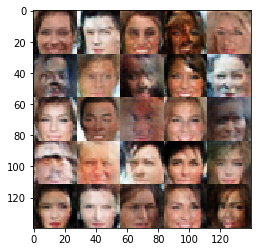

Epoch 1/1 Step:4610... Discriminator Loss: 1.3014... Generator Loss: 0.5022
Epoch 1/1 Step:4620... Discriminator Loss: 1.5417... Generator Loss: 0.4378
Epoch 1/1 Step:4630... Discriminator Loss: 1.3069... Generator Loss: 0.5660
Epoch 1/1 Step:4640... Discriminator Loss: 1.3390... Generator Loss: 0.5348
Epoch 1/1 Step:4650... Discriminator Loss: 1.3559... Generator Loss: 0.4811
Epoch 1/1 Step:4660... Discriminator Loss: 1.4912... Generator Loss: 0.3867
Epoch 1/1 Step:4670... Discriminator Loss: 1.3111... Generator Loss: 0.4373
Epoch 1/1 Step:4680... Discriminator Loss: 1.2913... Generator Loss: 0.5271
Epoch 1/1 Step:4690... Discriminator Loss: 1.2908... Generator Loss: 0.5538
Epoch 1/1 Step:4700... Discriminator Loss: 1.1420... Generator Loss: 0.6948


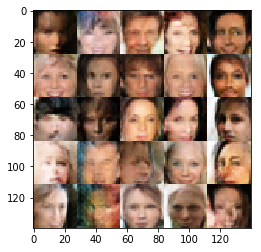

Epoch 1/1 Step:4710... Discriminator Loss: 1.1462... Generator Loss: 0.6759
Epoch 1/1 Step:4720... Discriminator Loss: 1.6779... Generator Loss: 0.3210
Epoch 1/1 Step:4730... Discriminator Loss: 1.1869... Generator Loss: 0.7505
Epoch 1/1 Step:4740... Discriminator Loss: 1.1615... Generator Loss: 0.7921
Epoch 1/1 Step:4750... Discriminator Loss: 1.2508... Generator Loss: 0.6743
Epoch 1/1 Step:4760... Discriminator Loss: 1.3252... Generator Loss: 0.4875
Epoch 1/1 Step:4770... Discriminator Loss: 1.1237... Generator Loss: 0.8054
Epoch 1/1 Step:4780... Discriminator Loss: 1.0687... Generator Loss: 0.7908
Epoch 1/1 Step:4790... Discriminator Loss: 1.4254... Generator Loss: 0.4862
Epoch 1/1 Step:4800... Discriminator Loss: 1.4194... Generator Loss: 0.4577


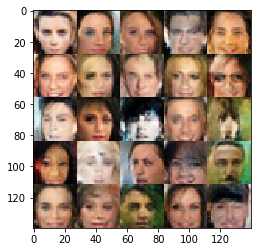

Epoch 1/1 Step:4810... Discriminator Loss: 1.3867... Generator Loss: 0.4396
Epoch 1/1 Step:4820... Discriminator Loss: 1.2940... Generator Loss: 0.6928
Epoch 1/1 Step:4830... Discriminator Loss: 1.1400... Generator Loss: 0.6873
Epoch 1/1 Step:4840... Discriminator Loss: 1.5072... Generator Loss: 0.4093
Epoch 1/1 Step:4850... Discriminator Loss: 1.4525... Generator Loss: 0.4223
Epoch 1/1 Step:4860... Discriminator Loss: 1.0940... Generator Loss: 0.7411
Epoch 1/1 Step:4870... Discriminator Loss: 1.4364... Generator Loss: 0.4334
Epoch 1/1 Step:4880... Discriminator Loss: 1.4633... Generator Loss: 0.3842
Epoch 1/1 Step:4890... Discriminator Loss: 1.4215... Generator Loss: 0.4286
Epoch 1/1 Step:4900... Discriminator Loss: 1.7161... Generator Loss: 0.4095


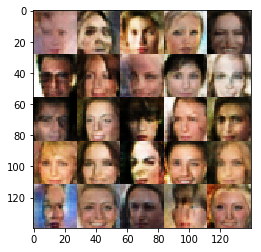

Epoch 1/1 Step:4910... Discriminator Loss: 1.2521... Generator Loss: 0.6045
Epoch 1/1 Step:4920... Discriminator Loss: 1.4911... Generator Loss: 0.4348
Epoch 1/1 Step:4930... Discriminator Loss: 1.6446... Generator Loss: 0.4340
Epoch 1/1 Step:4940... Discriminator Loss: 1.2675... Generator Loss: 0.5111
Epoch 1/1 Step:4950... Discriminator Loss: 1.5435... Generator Loss: 0.4269
Epoch 1/1 Step:4960... Discriminator Loss: 1.5093... Generator Loss: 0.3943
Epoch 1/1 Step:4970... Discriminator Loss: 1.4032... Generator Loss: 0.4694
Epoch 1/1 Step:4980... Discriminator Loss: 1.3963... Generator Loss: 0.4717
Epoch 1/1 Step:4990... Discriminator Loss: 1.5349... Generator Loss: 0.3725
Epoch 1/1 Step:5000... Discriminator Loss: 1.2437... Generator Loss: 0.5520


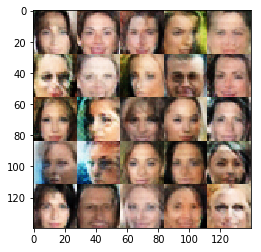

Epoch 1/1 Step:5010... Discriminator Loss: 1.5709... Generator Loss: 0.3386
Epoch 1/1 Step:5020... Discriminator Loss: 1.4792... Generator Loss: 0.4296
Epoch 1/1 Step:5030... Discriminator Loss: 1.4696... Generator Loss: 0.4512
Epoch 1/1 Step:5040... Discriminator Loss: 1.4864... Generator Loss: 0.4455
Epoch 1/1 Step:5050... Discriminator Loss: 1.7974... Generator Loss: 0.3137
Epoch 1/1 Step:5060... Discriminator Loss: 1.1555... Generator Loss: 0.9297
Epoch 1/1 Step:5070... Discriminator Loss: 1.3938... Generator Loss: 0.5627
Epoch 1/1 Step:5080... Discriminator Loss: 1.2650... Generator Loss: 0.4635
Epoch 1/1 Step:5090... Discriminator Loss: 1.3873... Generator Loss: 0.4803
Epoch 1/1 Step:5100... Discriminator Loss: 1.2838... Generator Loss: 0.5783


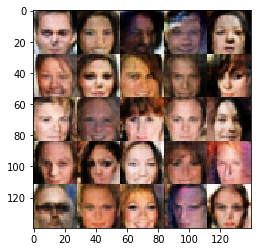

Epoch 1/1 Step:5110... Discriminator Loss: 1.4696... Generator Loss: 0.6908
Epoch 1/1 Step:5120... Discriminator Loss: 1.4320... Generator Loss: 0.4697
Epoch 1/1 Step:5130... Discriminator Loss: 1.4838... Generator Loss: 0.3757
Epoch 1/1 Step:5140... Discriminator Loss: 1.6841... Generator Loss: 0.3911
Epoch 1/1 Step:5150... Discriminator Loss: 1.8486... Generator Loss: 0.2334
Epoch 1/1 Step:5160... Discriminator Loss: 1.4099... Generator Loss: 0.5861
Epoch 1/1 Step:5170... Discriminator Loss: 1.7454... Generator Loss: 0.3215
Epoch 1/1 Step:5180... Discriminator Loss: 1.5895... Generator Loss: 0.4580
Epoch 1/1 Step:5190... Discriminator Loss: 1.2821... Generator Loss: 0.7853
Epoch 1/1 Step:5200... Discriminator Loss: 1.1524... Generator Loss: 0.7338


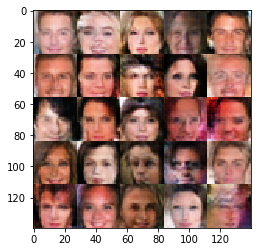

Epoch 1/1 Step:5210... Discriminator Loss: 1.3865... Generator Loss: 0.4234
Epoch 1/1 Step:5220... Discriminator Loss: 1.4062... Generator Loss: 0.5925
Epoch 1/1 Step:5230... Discriminator Loss: 1.2833... Generator Loss: 0.6720
Epoch 1/1 Step:5240... Discriminator Loss: 1.1624... Generator Loss: 0.7355
Epoch 1/1 Step:5250... Discriminator Loss: 1.2869... Generator Loss: 0.5248
Epoch 1/1 Step:5260... Discriminator Loss: 1.2507... Generator Loss: 0.6872
Epoch 1/1 Step:5270... Discriminator Loss: 1.4591... Generator Loss: 0.4317
Epoch 1/1 Step:5280... Discriminator Loss: 1.7722... Generator Loss: 0.3151
Epoch 1/1 Step:5290... Discriminator Loss: 1.4306... Generator Loss: 0.4999
Epoch 1/1 Step:5300... Discriminator Loss: 1.2992... Generator Loss: 0.5413


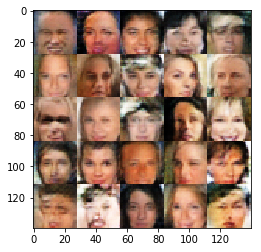

Epoch 1/1 Step:5310... Discriminator Loss: 1.2567... Generator Loss: 0.5555
Epoch 1/1 Step:5320... Discriminator Loss: 1.3964... Generator Loss: 0.4429
Epoch 1/1 Step:5330... Discriminator Loss: 1.2434... Generator Loss: 0.6937
Epoch 1/1 Step:5340... Discriminator Loss: 1.5048... Generator Loss: 0.4541
Epoch 1/1 Step:5350... Discriminator Loss: 1.3708... Generator Loss: 0.5926
Epoch 1/1 Step:5360... Discriminator Loss: 1.5024... Generator Loss: 0.5090
Epoch 1/1 Step:5370... Discriminator Loss: 1.4360... Generator Loss: 0.5063
Epoch 1/1 Step:5380... Discriminator Loss: 1.5704... Generator Loss: 0.5704
Epoch 1/1 Step:5390... Discriminator Loss: 1.3286... Generator Loss: 0.5087
Epoch 1/1 Step:5400... Discriminator Loss: 1.3229... Generator Loss: 0.4945


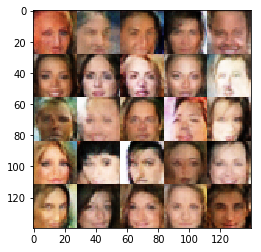

Epoch 1/1 Step:5410... Discriminator Loss: 1.4185... Generator Loss: 0.4685
Epoch 1/1 Step:5420... Discriminator Loss: 1.2500... Generator Loss: 0.8334
Epoch 1/1 Step:5430... Discriminator Loss: 1.4231... Generator Loss: 0.5277
Epoch 1/1 Step:5440... Discriminator Loss: 1.7485... Generator Loss: 0.3270
Epoch 1/1 Step:5450... Discriminator Loss: 1.1783... Generator Loss: 0.6480
Epoch 1/1 Step:5460... Discriminator Loss: 1.3760... Generator Loss: 0.6922
Epoch 1/1 Step:5470... Discriminator Loss: 1.2378... Generator Loss: 0.6353
Epoch 1/1 Step:5480... Discriminator Loss: 1.2620... Generator Loss: 0.5719
Epoch 1/1 Step:5490... Discriminator Loss: 1.3300... Generator Loss: 0.4895
Epoch 1/1 Step:5500... Discriminator Loss: 1.6502... Generator Loss: 0.5332


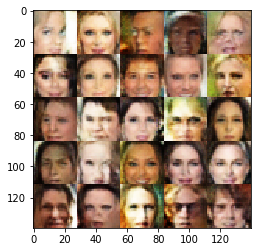

Epoch 1/1 Step:5510... Discriminator Loss: 1.5475... Generator Loss: 0.6692
Epoch 1/1 Step:5520... Discriminator Loss: 1.3489... Generator Loss: 0.5063
Epoch 1/1 Step:5530... Discriminator Loss: 1.3784... Generator Loss: 0.4722
Epoch 1/1 Step:5540... Discriminator Loss: 1.7515... Generator Loss: 0.3524
Epoch 1/1 Step:5550... Discriminator Loss: 1.2427... Generator Loss: 0.4977
Epoch 1/1 Step:5560... Discriminator Loss: 1.5453... Generator Loss: 0.3500
Epoch 1/1 Step:5570... Discriminator Loss: 1.4116... Generator Loss: 0.6340
Epoch 1/1 Step:5580... Discriminator Loss: 1.4311... Generator Loss: 0.4551
Epoch 1/1 Step:5590... Discriminator Loss: 1.6306... Generator Loss: 0.3433
Epoch 1/1 Step:5600... Discriminator Loss: 1.6069... Generator Loss: 0.3348


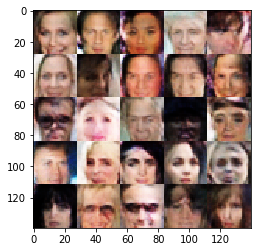

Epoch 1/1 Step:5610... Discriminator Loss: 1.3626... Generator Loss: 0.5408
Epoch 1/1 Step:5620... Discriminator Loss: 1.3020... Generator Loss: 0.5279
Epoch 1/1 Step:5630... Discriminator Loss: 1.5777... Generator Loss: 0.3978
Epoch 1/1 Step:5640... Discriminator Loss: 1.8489... Generator Loss: 0.2481
Epoch 1/1 Step:5650... Discriminator Loss: 1.7691... Generator Loss: 0.2544
Epoch 1/1 Step:5660... Discriminator Loss: 1.3621... Generator Loss: 0.4380
Epoch 1/1 Step:5670... Discriminator Loss: 1.6684... Generator Loss: 0.3729
Epoch 1/1 Step:5680... Discriminator Loss: 1.2289... Generator Loss: 0.6301
Epoch 1/1 Step:5690... Discriminator Loss: 1.5219... Generator Loss: 0.4156
Epoch 1/1 Step:5700... Discriminator Loss: 1.0920... Generator Loss: 0.8152


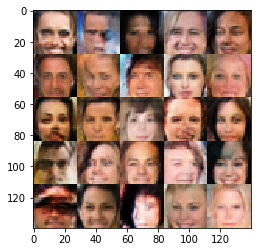

Epoch 1/1 Step:5710... Discriminator Loss: 1.4367... Generator Loss: 0.4319
Epoch 1/1 Step:5720... Discriminator Loss: 1.4696... Generator Loss: 0.3911
Epoch 1/1 Step:5730... Discriminator Loss: 1.3334... Generator Loss: 0.4672
Epoch 1/1 Step:5740... Discriminator Loss: 1.4293... Generator Loss: 0.4492
Epoch 1/1 Step:5750... Discriminator Loss: 1.1266... Generator Loss: 0.7345
Epoch 1/1 Step:5760... Discriminator Loss: 1.0796... Generator Loss: 0.7650
Epoch 1/1 Step:5770... Discriminator Loss: 1.2771... Generator Loss: 0.6540
Epoch 1/1 Step:5780... Discriminator Loss: 1.5454... Generator Loss: 0.4244
Epoch 1/1 Step:5790... Discriminator Loss: 1.2052... Generator Loss: 0.8505
Epoch 1/1 Step:5800... Discriminator Loss: 1.2771... Generator Loss: 0.6606


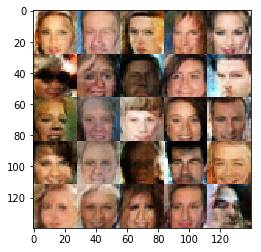

Epoch 1/1 Step:5810... Discriminator Loss: 1.3518... Generator Loss: 0.4762
Epoch 1/1 Step:5820... Discriminator Loss: 0.9790... Generator Loss: 0.7800
Epoch 1/1 Step:5830... Discriminator Loss: 1.3502... Generator Loss: 0.4636
Epoch 1/1 Step:5840... Discriminator Loss: 1.6722... Generator Loss: 0.5298
Epoch 1/1 Step:5850... Discriminator Loss: 1.5171... Generator Loss: 0.5425
Epoch 1/1 Step:5860... Discriminator Loss: 1.3976... Generator Loss: 0.4979
Epoch 1/1 Step:5870... Discriminator Loss: 1.5756... Generator Loss: 0.4183
Epoch 1/1 Step:5880... Discriminator Loss: 1.1326... Generator Loss: 0.6735
Epoch 1/1 Step:5890... Discriminator Loss: 1.3634... Generator Loss: 0.4765
Epoch 1/1 Step:5900... Discriminator Loss: 1.2199... Generator Loss: 0.5648


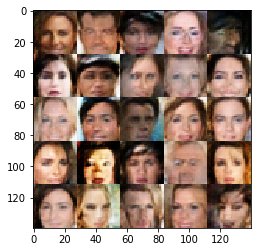

Epoch 1/1 Step:5910... Discriminator Loss: 1.5399... Generator Loss: 0.4913
Epoch 1/1 Step:5920... Discriminator Loss: 1.1072... Generator Loss: 0.7659
Epoch 1/1 Step:5930... Discriminator Loss: 1.5977... Generator Loss: 0.3645
Epoch 1/1 Step:5940... Discriminator Loss: 1.3329... Generator Loss: 0.4461
Epoch 1/1 Step:5950... Discriminator Loss: 1.2362... Generator Loss: 0.5132
Epoch 1/1 Step:5960... Discriminator Loss: 1.4902... Generator Loss: 0.4439
Epoch 1/1 Step:5970... Discriminator Loss: 1.1207... Generator Loss: 0.9231
Epoch 1/1 Step:5980... Discriminator Loss: 1.7280... Generator Loss: 0.4289
Epoch 1/1 Step:5990... Discriminator Loss: 1.4755... Generator Loss: 0.4141
Epoch 1/1 Step:6000... Discriminator Loss: 1.2825... Generator Loss: 0.5071


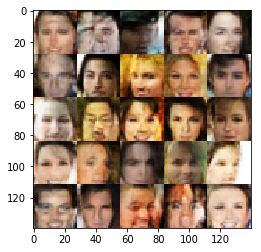

Epoch 1/1 Step:6010... Discriminator Loss: 1.3612... Generator Loss: 0.4592
Epoch 1/1 Step:6020... Discriminator Loss: 1.5722... Generator Loss: 0.4148
Epoch 1/1 Step:6030... Discriminator Loss: 1.9482... Generator Loss: 0.2177
Epoch 1/1 Step:6040... Discriminator Loss: 1.2022... Generator Loss: 0.6131
Epoch 1/1 Step:6050... Discriminator Loss: 1.3110... Generator Loss: 0.4610
Epoch 1/1 Step:6060... Discriminator Loss: 1.5139... Generator Loss: 0.5202
Epoch 1/1 Step:6070... Discriminator Loss: 1.4029... Generator Loss: 0.4881
Epoch 1/1 Step:6080... Discriminator Loss: 1.2686... Generator Loss: 0.5623
Epoch 1/1 Step:6090... Discriminator Loss: 1.4735... Generator Loss: 0.3936
Epoch 1/1 Step:6100... Discriminator Loss: 1.3265... Generator Loss: 0.5569


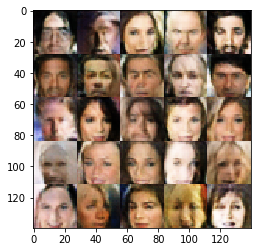

Epoch 1/1 Step:6110... Discriminator Loss: 1.5856... Generator Loss: 0.3876
Epoch 1/1 Step:6120... Discriminator Loss: 1.2523... Generator Loss: 0.5113
Epoch 1/1 Step:6130... Discriminator Loss: 1.3541... Generator Loss: 0.4045
Epoch 1/1 Step:6140... Discriminator Loss: 1.2560... Generator Loss: 0.6033
Epoch 1/1 Step:6150... Discriminator Loss: 1.8796... Generator Loss: 0.2951
Epoch 1/1 Step:6160... Discriminator Loss: 1.3582... Generator Loss: 0.4848
Epoch 1/1 Step:6170... Discriminator Loss: 1.4351... Generator Loss: 0.4046
Epoch 1/1 Step:6180... Discriminator Loss: 1.2798... Generator Loss: 0.6103
Epoch 1/1 Step:6190... Discriminator Loss: 1.4258... Generator Loss: 0.4496
Epoch 1/1 Step:6200... Discriminator Loss: 1.6556... Generator Loss: 0.3045


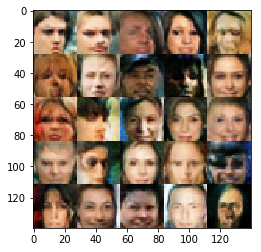

Epoch 1/1 Step:6210... Discriminator Loss: 1.5927... Generator Loss: 0.3646
Epoch 1/1 Step:6220... Discriminator Loss: 1.1326... Generator Loss: 0.9320
Epoch 1/1 Step:6230... Discriminator Loss: 1.2748... Generator Loss: 0.7499
Epoch 1/1 Step:6240... Discriminator Loss: 1.5623... Generator Loss: 0.4446
Epoch 1/1 Step:6250... Discriminator Loss: 1.6093... Generator Loss: 0.5959
Epoch 1/1 Step:6260... Discriminator Loss: 1.1710... Generator Loss: 0.7924
Epoch 1/1 Step:6270... Discriminator Loss: 2.0202... Generator Loss: 0.2206
Epoch 1/1 Step:6280... Discriminator Loss: 1.5297... Generator Loss: 0.4255
Epoch 1/1 Step:6290... Discriminator Loss: 1.2537... Generator Loss: 0.7342
Epoch 1/1 Step:6300... Discriminator Loss: 1.2290... Generator Loss: 0.6015


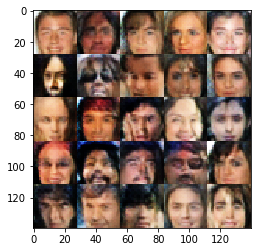

Epoch 1/1 Step:6310... Discriminator Loss: 1.4546... Generator Loss: 0.4722
Epoch 1/1 Step:6320... Discriminator Loss: 1.5059... Generator Loss: 0.3860
Epoch 1/1 Step:6330... Discriminator Loss: 1.3928... Generator Loss: 0.4996


In [38]:
batch_size = 32
z_dim = 200
learning_rate = 0.0003
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))

with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.